## ***Case Study 1 : Predicting types of sexual harassments with personal stories***


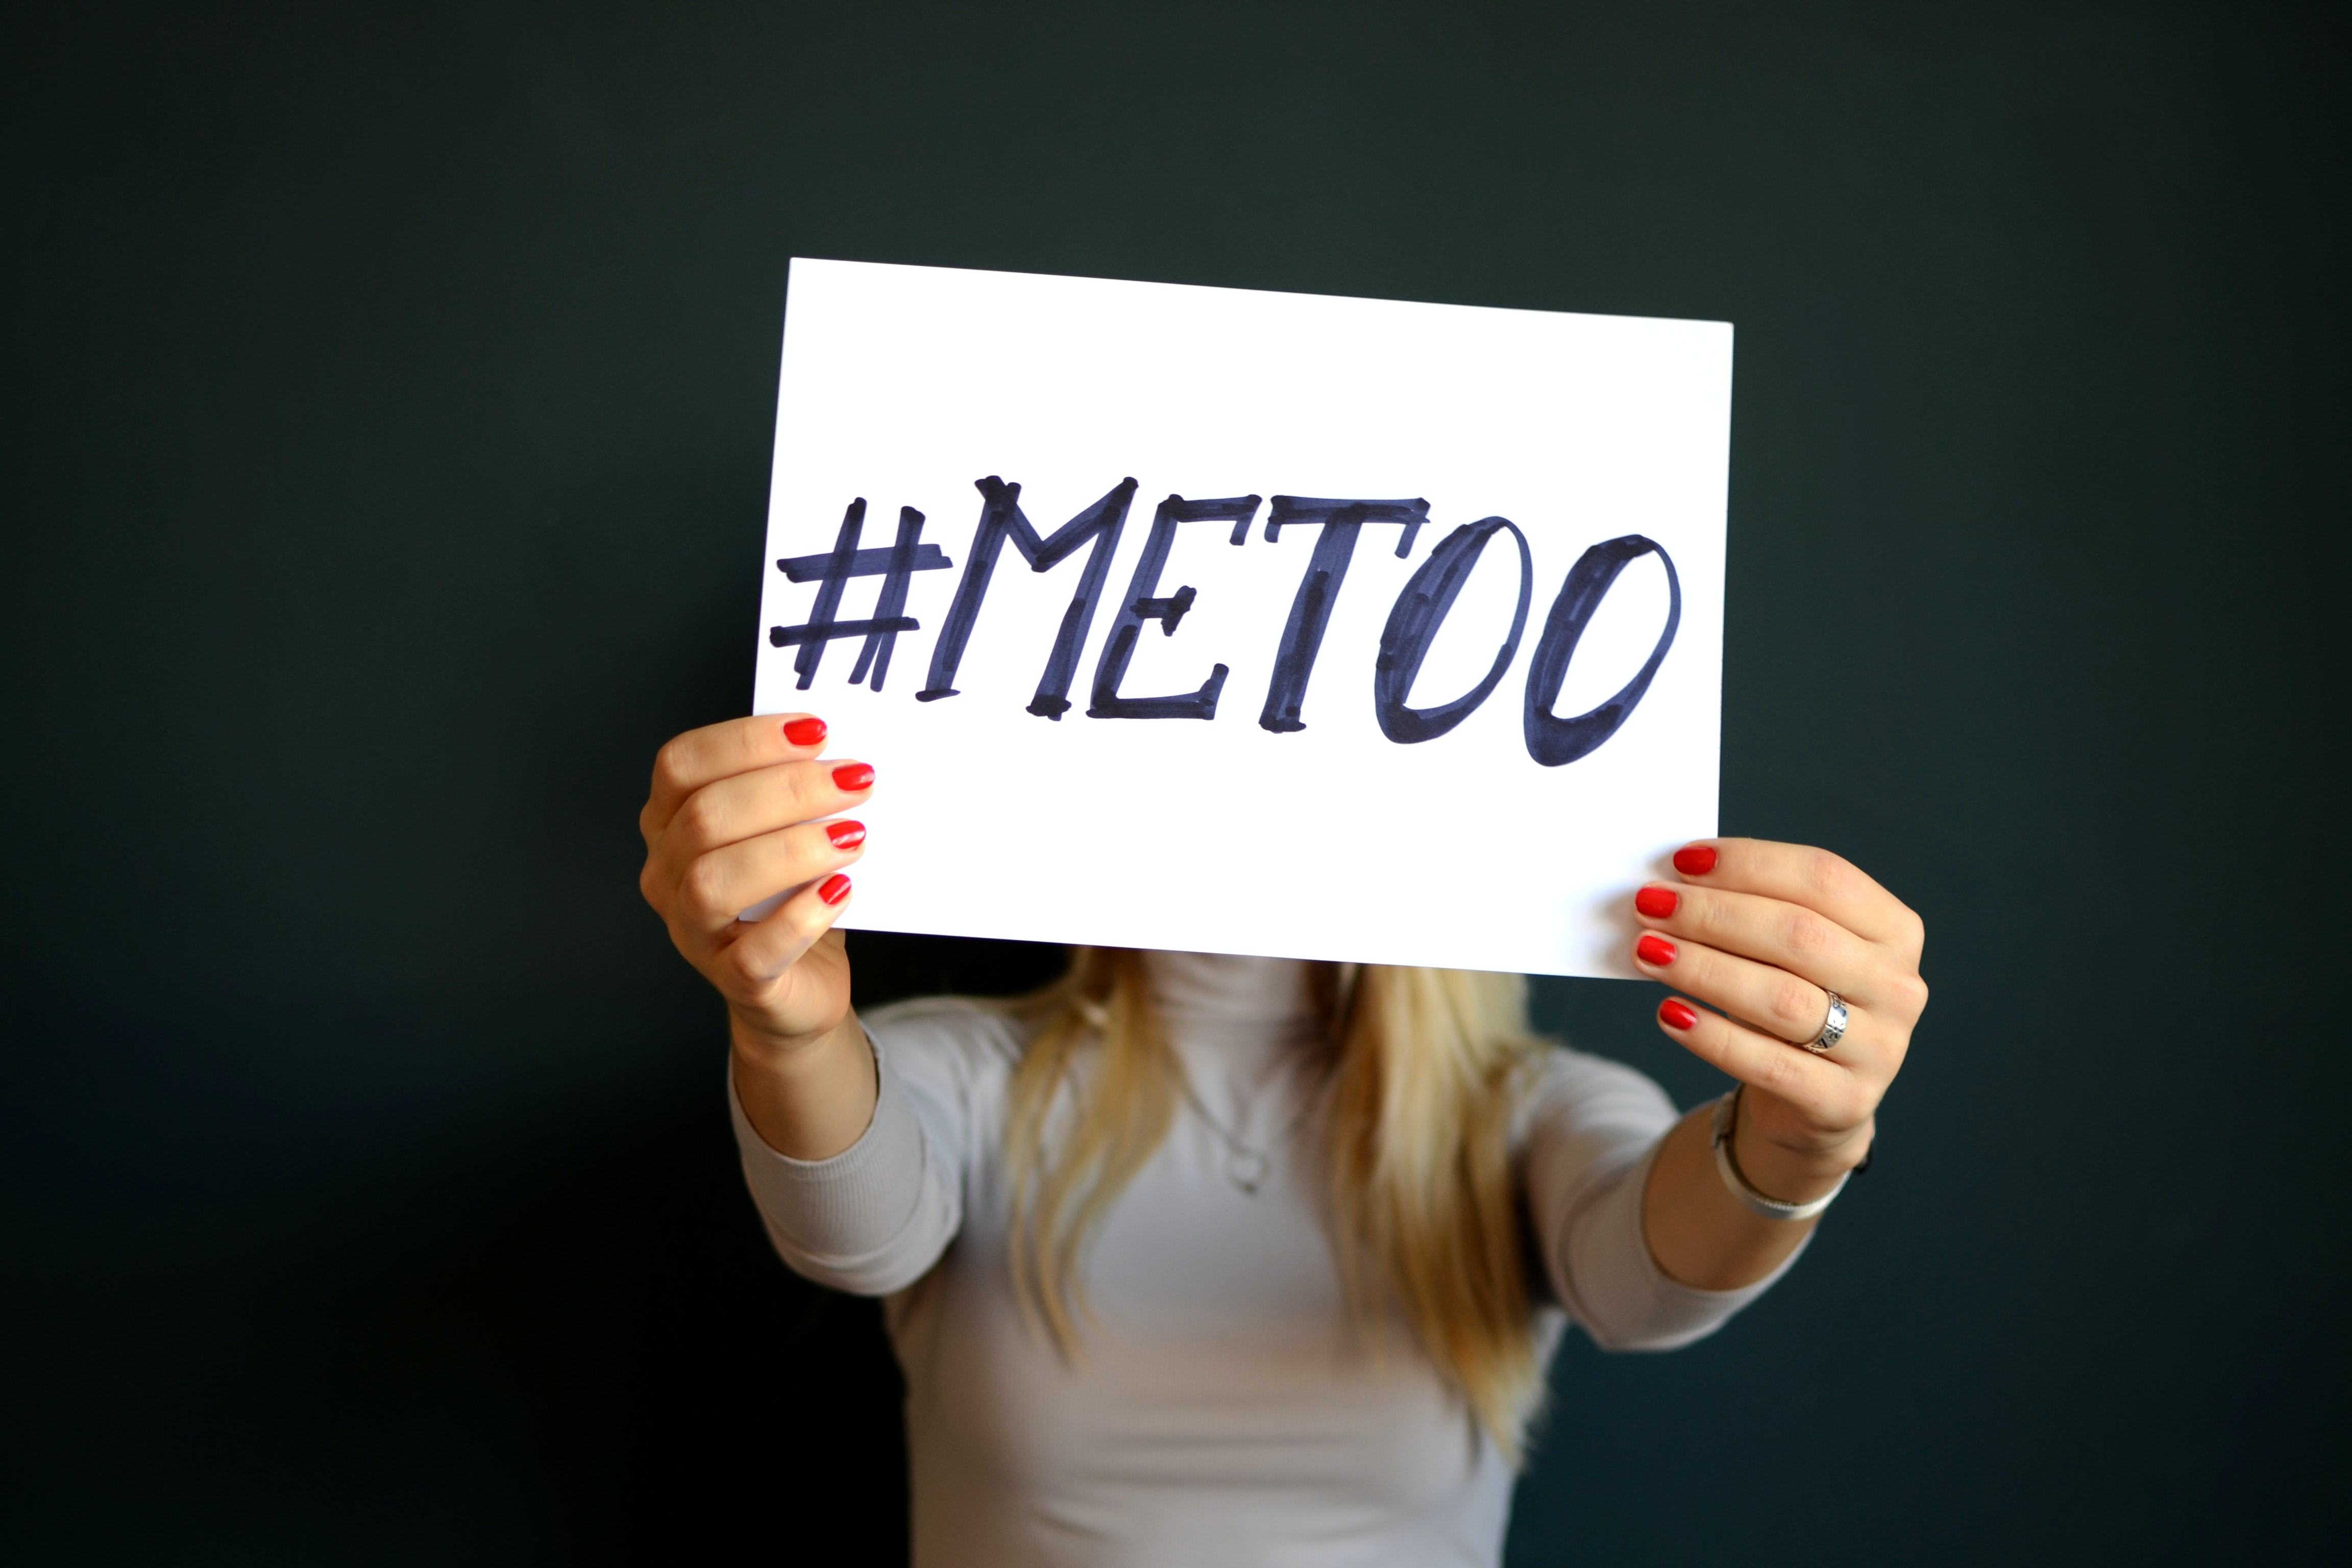

# **Overview**

1.   With the recent rise of #MeToo, an increasing  number of personal stories about sexual harassment and sexual abuse have been shared online. This case study tries to automatically categorize and analyze various forms of sexual harassment, based on stories shared on online forum SafeCity for the labels of groping/touching, ogling/staring, and commmenting.

2.   With the vast amount of personal stories on the internet Manually sorting and  comprehending the information shared in these stories is arduous task and power of NLP can be used to automate this task

3.   This automatic classification of different forms of sexual harassment can help victims and authorities to partially automate and speed up the process of filling online sexual violence reporting forms

4.   This large-scale automatic categorization, summarization, and analysis of personal abuse stories can help activist groups enlighten the public.

5.   This automatic classification of different forms of sexual harassment can help victims and authorities to partially automate and speed up the process of filling online sexual violence reporting forms which usually requires the victim to detail each form of sexual harassment that took place.




# **Problem Statement**

 Predict the types of sexual harassment given a description on the incident the incident may belong to one , more or none of the three categories of sexual harassment namely commenting, goping/touching and ogling/staring

For Example : The description "My college was nearby. This happened all the time. Guys passing comments, staring, trying to touch. Frustrating" is positive 
for three classes: commenting, ogling/staring, and touching/groping.


# **Scource of the Data** 
Data Source : [https://github.com/swkarlekar/safecity](https://github.com/swkarlekar/safecity)

Research paper : [https://arxiv.org/pdf/1809.04739.pdft](https://arxiv.org/pdf/1809.04739.pdf)

The Data set consist of two folders one for single label classification(binary_classification) and another for multi-label classification(multilabel_classification) 

Single Label Classification

> **binary_classification** folder consist of three sub folder one for each class namely commenting_data, groping_data and ogling_data each sub folder consist of three csv files for train, dev and test set. The data for single-label classification is given in two columns, with the first column being the description of the incident and the second column being 1 if the category of sexual harassment is present and 0 if it is not.  

For each category, there are 7201 training samples, 990 development/validation    samples, and 1701 test samples.

> **multilabel_classification** folder consist of three cvs files for train, dev and test set. The Data for multi-label classification consists of three columns with first column being the  description of the incident and and the second, third, and fourth column being 1 if the category of sexual harassment is present and 0 if it is not. 

There are 7201 training samples, 990 development samples, and 1701 test samples.


**<h2>Real World / Business Objectives and Constraints</h2>**
1. Predict labels with high precision and recall.
2. Incorrect label could cause the filling out incident reports incorrectly. 
3. No strict latency constraints.

# **Machine Learning problem**

The above problem of predicting the label give a text description of the incident can be solved using NLP techniques building both

1. Single-Label Classification : Building a Binary Classification Model for predicting whether an input belongs to a particular category or not.

2. Multi-label Classification : Building a Multi-label Classification for  predicting multiple categories simultaneously for the same input

# **Evaluation metrices for multi-label classification**
In traditional classification such as mulit-class problems, accuracy is the most commom evaluation criteria.
additionally there exists a set of standard evaluuation metrics that includes precision, recall, F-measure, 
and ROC area defined for single label multi-class classification problem. However, in multi-label classification, predictions for an instance
is a set of labels and therefore, the prediction can be fully correct,      partially correct 
(with difference levels of correctness) or fully incorrect. None of the existing evaluation metrics capture such notion in
their original form. this makes evaluation of a multi-label classifier more challenging than evaluation of a single label classifier.

To capture the notion of partially correct, one strategy is to evaluate the average over all examples in the test set. This 
approach is called example based evaluations. Seemingly, one could define a label based evauation where each label is evaluated 
first and then averaged over all labels. It is important to note that any such label based method would fail to directly address 
the correlations among different classes 


**Hamming Loss (HL):** Hammimg Loss reports how many times on average, the relevance of an example to a class label is incorrectly predicted.
Therefore, hamming loss takes into account the prediction error (an incorrect label is predicted) and missing error (a relevant label not predicted), normalized over total number of classes and total number of examples.

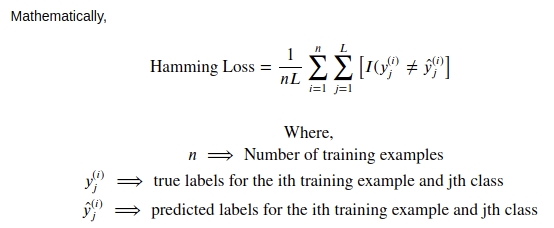

Ideally we, would expect hammimg loss, HL = 0, which would imply no error practically the smaller the value of hamming loss, the better the
performance of the learning algorithm. 


In order to account for partially correctness modified verions of accuracy, precision, recall, and F1 measure can be used.



**Accracy(A):**Accuracy for each instance is defined as the proportion of the predicted correct labels to the total number (predicted and actual) of labels for that instance. Overall accuracy is the average across all instances. It is less ambiguously referred to as the Hamming score.

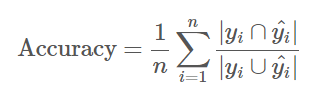


**Precision(P):** It is the proportion of predicted correct labels to the total number of actual labels, averaged over all instances.

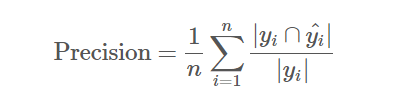

**Recall(R):** It is the propotion of predicted correct labels to the total number of predicted labels, averaged over all instances.

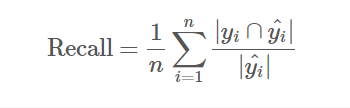


**F1-Measure(F)**: Harmonic mean of Precision(P) and Recall(R) gives F1-Measure

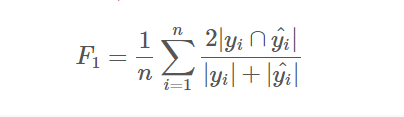

As in single label multi-class classification, the higher the value of accuracy, precision, recall and F1-score the better the performance of the learning algorithm.


# **Exploratory data analysis**

In [1]:
import pandas as pd
import string
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
punctuation = string.punctuation

###################
# import the required libraries  
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow import keras
from keras.preprocessing import sequence, text
from keras.layers import Input, Embedding
#####################
from string import punctuation
import string
punctuation = string.punctuation
#####################
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
stop_words = list(set(stopwords.words('english')))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
train = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Assignment_applied_AI/case study 1/self case study safecity/multilabel_classification/train.csv')

validation = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Assignment_applied_AI/case study 1/self case study safecity/multilabel_classification/dev.csv')

test = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Assignment_applied_AI/case study 1/self case study safecity/multilabel_classification/test.csv')

In [5]:
# change the column names

train.rename(columns={"Ogling/Facial Expressions/Staring": "Staring", "Touching /Groping": "Touching"}, inplace=True)
validation.rename(columns={"Ogling/Facial Expressions/Staring": "Staring", "Touching /Groping": "Touching"},inplace=True)
test.rename(columns={"Ogling/Facial Expressions/Staring": "Staring", "Touching /Groping": "Touching"},inplace=True)

In [6]:
train.head()

,Description,Commenting,Staring,Touching
0,"Was walking along crowded street, holding mums...",0,0,1
1,This incident took place in the evening.I was ...,0,1,0
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0
3,Incident happened inside the train,0,0,0
4,I witnessed an incident when a chain was bruta...,0,0,0


In [7]:
train.shape, validation.shape, test.shape

((7201, 4), (990, 4), (1701, 4))

In [8]:
# here we are concatenating train and dev set so that we have more data for training the models
train = pd.concat([train, validation], axis=0 ) # concat train and validation set 

In [9]:
# check for null values in the dataset
train.isnull().any()   

Description    False
Commenting     False
Staring        False
Touching       False
dtype: bool

In [10]:
# check for null values in the dataset
test.isnull().any()

Description    False
Commenting     False
Staring        False
Touching       False
dtype: bool

In [11]:
# looking for duplicate rows in the train and test set 
dup_train = train[train['Description'].duplicated()].shape[0]  # get count of duplicates
dup_test = test[test['Description'].duplicated()].shape[0]

print('Duplicate rows in Train set is ', dup_train)
print('Duplicate rows in Test set  is ', dup_test)

Duplicate rows in Train set is  658
Duplicate rows in Test set  is  93


In [12]:
# keep the first occurance of duplicates for all the datasets and drop the rest

train.drop_duplicates(keep = 'first', inplace=True)
test.drop_duplicates(keep = 'first', inplace=True)

In [13]:
total = train.shape[0]
count = [sum(train.Commenting.values)/total, sum(train['Staring'].values)/total, sum(train['Touching'].values)/total] # count of each Category 
label = ['Commenting', 'Staring', 'Touching']  # Categorys

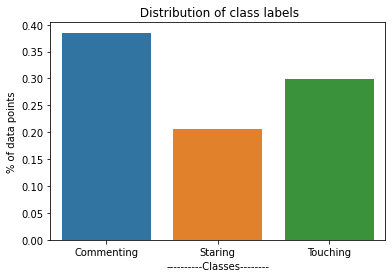

In [14]:
# now let's look at the distribution of the three classes for train set

import matplotlib.pyplot as plt

plt.title(" Distribution of class labels")
plt.xlabel("----------Classes--------")
plt.ylabel("% of data points")
sns.barplot(label, count)
plt.show()    

#### **observation** :
we can see that the class distribution is not balanced with incident like commenting occuring very often follwed touching and string it should also be noted that the distribution is not highly imbalanced 

In [15]:
# now let's look at the distribution of the three classes in combination with each other
counts_of_class = train[label].sum(axis = 1).value_counts()

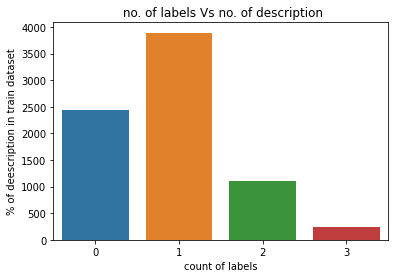

In [16]:
plt.title(" no. of labels Vs no. of description")
plt.xlabel("count of labels")
plt.ylabel("% of deescription in train dataset")
sns.barplot(counts_of_class.index , counts_of_class.values)
plt.show()    

#### **observation:**
most of the description in the train data has mention of one of the three incident happing and there are relatively few description mentioning all three incidents happning simultaneously and also there are almost 2500 description where no form of harrasment is mentioned.   

In [17]:
from wordcloud import WordCloud, STOPWORDS

def word_cloud(data, column):  # ref: https://www.geeksforgeeks.org/generating-word-cloud-python/
    comment_words = ''
    stopwords = set(STOPWORDS)
    # iterate through the csv file
    for val in data[column]:	
	# typecaste each val to string
	    val = str(val)
	# split the value
	    tokens = val.split()	
	# Converts each token into lowercase
	    for i in range(len(tokens)):
		    tokens[i] = tokens[i].lower()	
	    comment_words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 500, height = 300,
				background_color ='black',
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words)
    # plot the WordCloud image					
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [18]:
# now lets look at the most frequent words/unigrams occuring in descriptions having mention of one or more form of sexual harrasment

all_harassment = train[(train['Commenting']==1) | (train['Staring']==1) | (train['Touching']==1)]

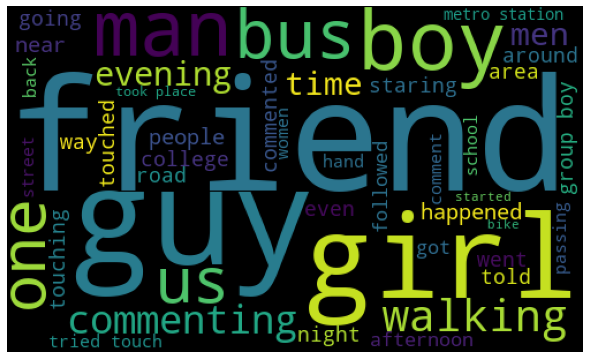

In [19]:
word_cloud(all_harassment, 'Description')

#### **observation:**
most frequent words are friends, guy, girl, bus etc. this kind of analysis can give us a context in which a particular harrasment is happning for example most of the description has mention of guys and boys from which we can infer that most of the incident happens when there are boys or men around also public transit like bus or train can be the hotspot of harassment incident.    

### let's do the same analysis with bi and trigram words

In [20]:
# lets do the same analysis using bi-grams and tri-grams

def word_cloud_ngram(data_frame, column, grams, n, remove_stop=None):
    """
        data_frame : data frame
        column : text cloumn
        grams : n grams to consider
        n : get top n ngrams
        remove_stop : to remove stop word 

    """
    vec = CountVectorizer(ngram_range=(grams, grams), stop_words=remove_stop).fit(data_frame[column]) # BOW
    bag_of_words = vec.transform(data_frame[column]) # transform data
    sum_words = bag_of_words.sum(axis=0)    # count of each word
    words_freq = [(word, sum_words[0, id]) for word, id in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    words_freq = words_freq[:n]  
    d = {i[0].replace(" ", '_'):i[1] for i in words_freq }  # create a dictionary of trigram words and its count
    wordcloud = WordCloud(width = 500, height = 300,
				background_color ='black',
				stopwords = stopwords, 
				min_font_size = 10).generate_from_frequencies(d)  # genarate the word cloud form dictionary
    # plot the WordCloud image					
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

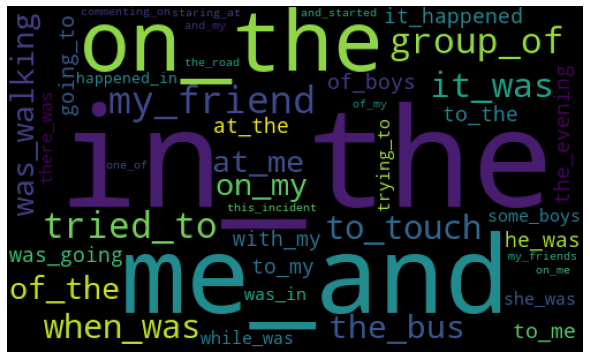

In [21]:
word_cloud_ngram(all_harassment, "Description", 2, 1000)

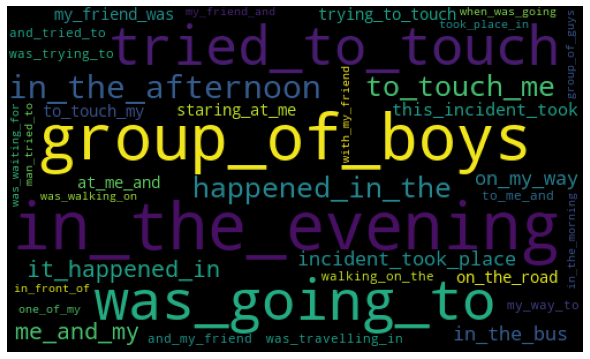

In [22]:
word_cloud_ngram(all_harassment, "Description", 3, 1000)

#### **observation:**
here we are getting much more context around harassment incident such as "in_the_evening" tri-gram suggest that most of the incident may be taking place in the evening time "in_the_bus" "on_the_road" also give us the context around which sexual harrasment is prevalent. 

# **Feature Engineering**

### Before preprocessing

In [24]:
# basic feature engineering before preprocessing text

def feature_before_preprocessing(data, text_column): 
    '''
    data : dataframe 
    text_column : column name 
    '''
    
    data['description_len'] = data[text_column].astype(str).apply(len)  # length of the text
    data['word_count'] = data[text_column].apply(lambda x: len(str(x).split()))  # count of words 
    data['word_density'] = data['description_len'] / (data['word_count']+1)  # density of description

    data['punctuation_count'] = data[text_column].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) # count of punctuation 
    data['title_word_count'] = data[text_column].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()])) # count of title 
    data['upper_case_word_count'] = data[text_column].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))  # upper case word count
    data['stopword_count'] = data[text_column].apply(lambda x: len([wrd for wrd in x.split() if wrd.lower() in stop_words]))  # count of stopwords
    return data

In [25]:
train = feature_before_preprocessing(train, 'Description')   # get the features
test = feature_before_preprocessing(test, 'Description')
test.head()

,Description,Commenting,Staring,Touching,description_len,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,stopword_count
0,"During morning, a woman was walking by and thi...",1,1,0,151,30,4.870968,4,2,0,13
1,A man tried to brush his penis off of a woman'...,0,0,1,68,15,4.250000,2,1,1,8
2,This happened to a fellow passenger of mine tr...,0,1,0,151,25,5.807692,2,2,0,14
3,ogling,0,1,0,6,1,3.000000,0,0,0,0
4,When I was returning my home after finishing m...,0,0,1,185,40,4.512195,2,3,2,25


### After preprecessing

In [26]:
# preprocessing 

import re
from nltk.stem import WordNetLemmatizer  # lemmatizer
stemmer = WordNetLemmatizer()

def preprocess(text):
    
    text = re.sub(r"won\'t", "will not", text)   # decontracting the words
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    text = re.sub(r'\W', ' ', str(text))  # Remove all the special characters

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # remove all single characters 

    text = re.sub(r"[0-9]", "", text)  # replace number with space
    
    text = re.sub(r"[^A-Za-z_]", " ", text)  # replace all the words except "A-Za-z_" with space
    
    text = re.sub(r'[^\w\s]','',text)

    text = ' '.join(e for e in text.split() if e.lower() not in stopwords.words('english') and len(e)>2)  # convert to lower and remove stopwords discard words whose len < 2
    
    text = text.lower().strip()   # strip

    # Lemmatization
    tokens = text.split()
    tokens = [stemmer.lemmatize(word) for word in tokens]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 2]

    new_text = ' '.join(tokens)

    return new_text

In [27]:
# preprocessing the description column
train['Description']= train['Description'].map(lambda a: preprocess(a))   
test['Description']= test['Description'].map(lambda a: preprocess(a))

In [28]:
train_text = list(train.Description.values)  # list of preprecessed text
test_text = list(test.Description.values)     

## **tf-idf vectorization** 

### word

In [29]:
vect_word = TfidfVectorizer(max_features=5000, analyzer='word', stop_words='english', ngram_range=(1,3), dtype=np.float32)

vect_word.fit(train_text)  # fit on train

tfidf_train = vect_word.transform(train_text)  # transform
tfidf_test = vect_word.transform(test_text)

In [30]:
tfidf_word_features = vect_word.get_feature_names()   # feature name

### character

In [31]:
# character level tf-idf for Description text
char_word = TfidfVectorizer(max_features=5000, analyzer='char', stop_words='english', ngram_range=(1,4), dtype=np.float32) 
char_word.fit(train_text)  # fit 

# transform
tfidf_train_char = char_word.transform(train_text)
tfidf_test_char = char_word.transform(test_text)

In [32]:
tfidf_char_feature = char_word.get_feature_names()  # feature name

### **Numerical Fratures**

In [33]:
# normalize the numerical feature
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() 

numerical_data = train[['description_len', 'word_count', 'word_density', 'punctuation_count', 'title_word_count', 'upper_case_word_count', 'stopword_count']]
normalizer.fit(numerical_data)    # fit

Normalizer(copy=True, norm='l2')

In [34]:
column = ['description_len', 'word_count', 'word_density', 'punctuation_count', 'title_word_count', 'upper_case_word_count', 'stopword_count']

train_num = normalizer.transform(train[column])   # transform
test_num = normalizer.transform(test[column])

### **Combine tf-idf word, tfidf character and numerical features**

In [35]:
train_text = train['Description']
test_text = test['Description']
all_text = pd.concat([train_text, test_text])

In [36]:
from sklearn.pipeline import make_union

vectorizer = make_union(vect_word, char_word, n_jobs=2)

vectorizer.fit(all_text)   
train_features = vectorizer.transform(train_text)
test_features = vectorizer.transform(test_text)

In [37]:
from scipy.sparse import hstack       

X_tr_tfidf = hstack((train_num, train_features)).tocsr()
X_te_tfidf = hstack((test_num, test_features)).tocsr()

print("Final Data matrix with tf-idf word, character for description and numerical feuture.")
print(X_tr_tfidf.shape)
print(X_te_tfidf.shape)
print("="*100)

Final Data matrix with tf-idf word, character for description and numerical feuture.
(7670, 10007)
(1640, 10007)


### **tf-idf weighted Word2Vec**

In [38]:
# using pre-trained glove model  

import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Assignment_applied_AI/Assignment_8/6_Donors_choose_NB/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [39]:
# we are creating a dictionary with word as a key, and the idf as a value

dictionary = dict(zip(vect_word.get_feature_names(), list(vect_word.idf_)))  # we have alraedy learned the vocabulary when vectorizing the 'Description' feature 
tfidf_words = set(vect_word.get_feature_names())

In [40]:
# tf-idf Word2Vec for training set
# compute tf-idf weighted  word2vec for each description in train_text

from tqdm import tqdm 
tfidf_w2v_vectors_train = [] # the tfidf-w2v for each description is stored in this list
for sentence in tqdm(train_text): # for each description
    vector = np.zeros(300) # as word vectors are of zero length
    tfidf_weight = 0 # num of words with a valid vector in the description
    for word in sentence.split(): # for each word in a description
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tfidf_weight += tf_idf
    if tfidf_weight != 0:
        vector /= tfidf_weight
    tfidf_w2v_vectors_train.append(vector)

100%|██████████| 7670/7670 [00:00<00:00, 8322.55it/s]


In [41]:
# tf-idf Word2Vec for test set
# compute tf-idf weighted word2vec for each description in test_text

tfidf_w2v_vectors_test = [] # the tfidf-w2v for each description is stored in this list
for sentence in tqdm(test_text): # for each description
    vector = np.zeros(300) # as word vectors are of zero length
    tfidf_weight = 0 # num of words with a valid vector in the description
    for word in sentence.split(): # for each word in a description
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tfidf_weight += tf_idf
    if tfidf_weight != 0:
        vector /= tfidf_weight
    tfidf_w2v_vectors_test.append(vector)

100%|██████████| 1640/1640 [00:00<00:00, 10593.14it/s]


In [42]:
tfidf_w2v_vectors_train = np.array(tfidf_w2v_vectors_train)  # vector representation for description
tfidf_w2v_vectors_test = np.array(tfidf_w2v_vectors_test)

### **final features with tf-idf weighted w2v and numerical features**

In [43]:
from scipy.sparse import hstack       

X_tr_tfidf_w2v = np.concatenate([train_num, tfidf_w2v_vectors_train], axis=1)
X_te_tfidf_w2v = np.concatenate([test_num, tfidf_w2v_vectors_test], axis=1)

print("Final Data matrix with tf-idf w2v representation for description")
print(X_tr_tfidf_w2v.shape)
print(X_te_tfidf_w2v.shape)
print("="*100)

Final Data matrix with tf-idf w2v representation for description
(7670, 307)
(1640, 307)


### **fasttext word embadding**

In [44]:
from gensim.models.fasttext import FastText
%matplotlib inline 

In [45]:
embedding_size = 300  #  size of the embedding vector. 
window_size = 20    # size of the number of words occurring before and after the word based on which the word representations.
min_word = 5  # minimum frequency of a word in the corpus for which the word representations will be generated
down_sampling = 1e-2   # most frequently occurring word will be down-sampled by a number specified by the down_sampling 

In [46]:
word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(sent) for sent in train_text]

In [47]:
%%time
ft_model = FastText(word_tokenized_corpus,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)

CPU times: user 7min 24s, sys: 1.13 s, total: 7min 26s
Wall time: 3min 50s


### Top 5 most similar words for 'touch', 'commenting', 'staring', 'road', 'metro' are

In [48]:
similar_words = {words: [item[0] for item in ft_model.wv.most_similar([words], topn=5)]
                  for words in ['touch', 'commenting', 'staring', 'road', 'metro']}

for k,v in similar_words.items():
    print(k+":"+str(v))

touch:['trying', 'stomach', 'yatayat', 'try', 'purposely']
commenting:['commented', 'whistling', 'wistling', 'catcall', 'comment']
staring:['wierd', 'continuously', 'stared', 'weird', 'awkward']
road:['cross', 'stretch', 'walking', 'main', 'connecting']
metro:['rajiv', 'station', 'gtb', 'yellow', 'feeder']


In [49]:
# fastText word embedding for training set

from tqdm import tqdm 
fasttext_vectors_train = []    
for sentence in tqdm(train_text): # for each description
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0
    for word in sentence.split(): # for each word in a description
        try:
            vec = ft_model.wv[word] # getting the vector for each word
            vector += vec # add it 
            cnt_words += 1
        except:
            vec = np.zeros(300)
            vector += vec

    if cnt_words != 0:
        vector /= cnt_words  # average of the vector 

    fasttext_vectors_train.append(vector)

100%|██████████| 7670/7670 [00:00<00:00, 8228.55it/s]


In [50]:
# fastText word embedding for training set

from tqdm import tqdm 
fasttext_vectors_test = []    
for sentence in tqdm(test_text): # for each description
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0
    for word in sentence.split(): # for each word in a description
        try:
            vec = ft_model.wv[word] # getting the vector for each word
            vector += vec # calculating tfidf weighted w2v
            cnt_words += 1
        except:
            vec = np.zeros(300)
            vector += vec
    if cnt_words != 0:
        vector /= cnt_words
        
    fasttext_vectors_test.append(vector)

100%|██████████| 1640/1640 [00:00<00:00, 7476.31it/s]


In [51]:
fasttext_vectors_train = np.array(fasttext_vectors_train)  # fastText embedded  vector
fasttext_vectors_test = np.array(fasttext_vectors_test)

### **Final Feature with fastText embedded vector and numerical feature**

In [52]:
from scipy.sparse import hstack       

X_tr_fasttext = np.concatenate([train_num, fasttext_vectors_train], axis=1)
X_te_fasttext = np.concatenate([test_num, fasttext_vectors_test], axis=1)

print("Final Data matrix with fastText representation for description")
print(X_tr_fasttext.shape)
print(X_te_fasttext.shape)
print("="*100)

Final Data matrix with fastText representation for description
(7670, 307)
(1640, 307)


### **Autoencoder Feature Extraction for fastText embedded vector**

In [53]:
# train autoencoder for classification with with compression in the bottleneck layer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

# number of input columns
n_inputs = X_tr_fasttext.shape[1]   # input shape of the fastText embedded layer

# define encoder
visible = Input(shape=(n_inputs,))    
# encoder level 1
e = Dense(200)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# encoder level 2
e = Dense(100)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# bottleneck
bottleneck = Dense(50)(e)

# define decoder, level 1
d = Dense(100)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# decoder level 2
d = Dense(200)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model

model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

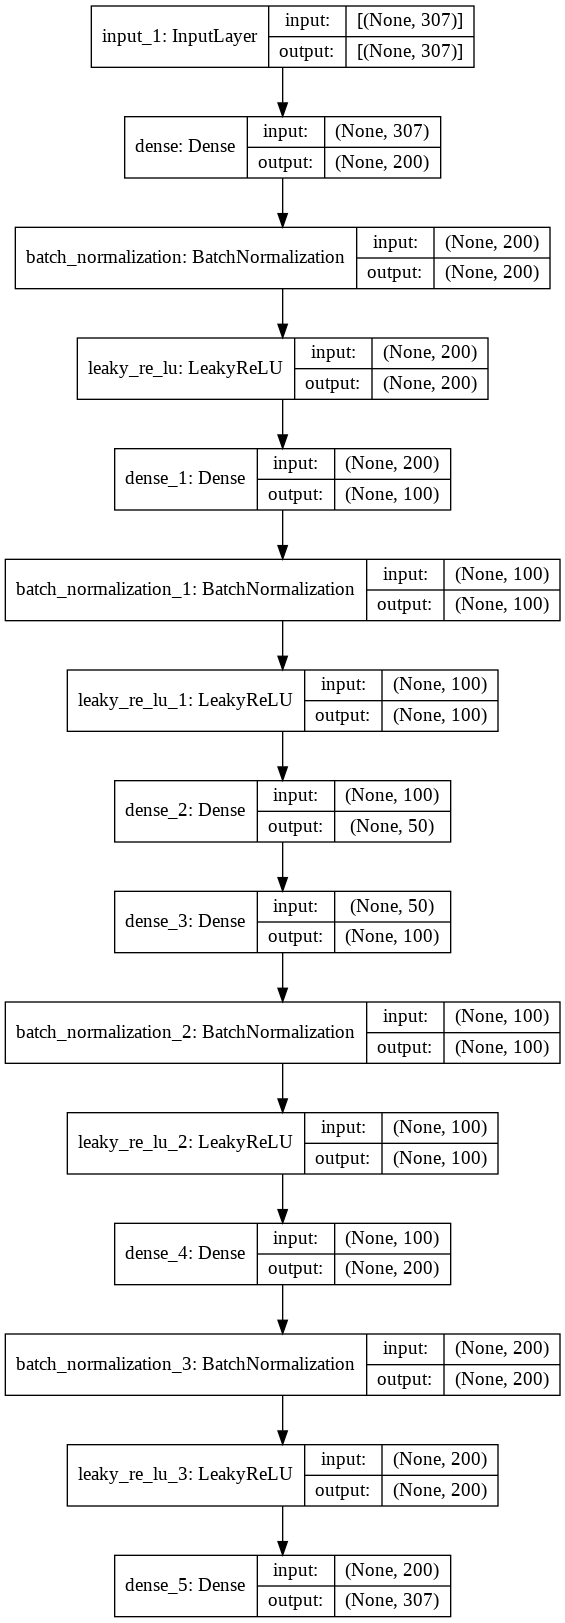

In [54]:
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)

In [55]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_tr_fasttext, X_tr_fasttext, epochs=300, batch_size=16, verbose=2, validation_data=(X_te_fasttext, X_te_fasttext))

Epoch 1/300
480/480 - 3s - loss: 0.0299 - val_loss: 0.0143
Epoch 2/300
480/480 - 2s - loss: 0.0133 - val_loss: 0.0136
Epoch 3/300
480/480 - 2s - loss: 0.0125 - val_loss: 0.0123
Epoch 4/300
480/480 - 2s - loss: 0.0119 - val_loss: 0.0113
Epoch 5/300
480/480 - 2s - loss: 0.0113 - val_loss: 0.0106
Epoch 6/300
480/480 - 2s - loss: 0.0108 - val_loss: 0.0100
Epoch 7/300
480/480 - 2s - loss: 0.0102 - val_loss: 0.0093
Epoch 8/300
480/480 - 2s - loss: 0.0097 - val_loss: 0.0087
Epoch 9/300
480/480 - 2s - loss: 0.0094 - val_loss: 0.0083
Epoch 10/300
480/480 - 2s - loss: 0.0090 - val_loss: 0.0080
Epoch 11/300
480/480 - 2s - loss: 0.0087 - val_loss: 0.0079
Epoch 12/300
480/480 - 2s - loss: 0.0085 - val_loss: 0.0076
Epoch 13/300
480/480 - 2s - loss: 0.0083 - val_loss: 0.0075
Epoch 14/300
480/480 - 2s - loss: 0.0081 - val_loss: 0.0071
Epoch 15/300
480/480 - 2s - loss: 0.0080 - val_loss: 0.0070
Epoch 16/300
480/480 - 2s - loss: 0.0078 - val_loss: 0.0070
Epoch 17/300
480/480 - 2s - loss: 0.0077 - val_lo

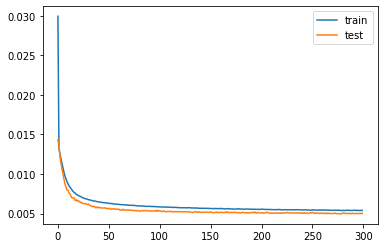

In [56]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

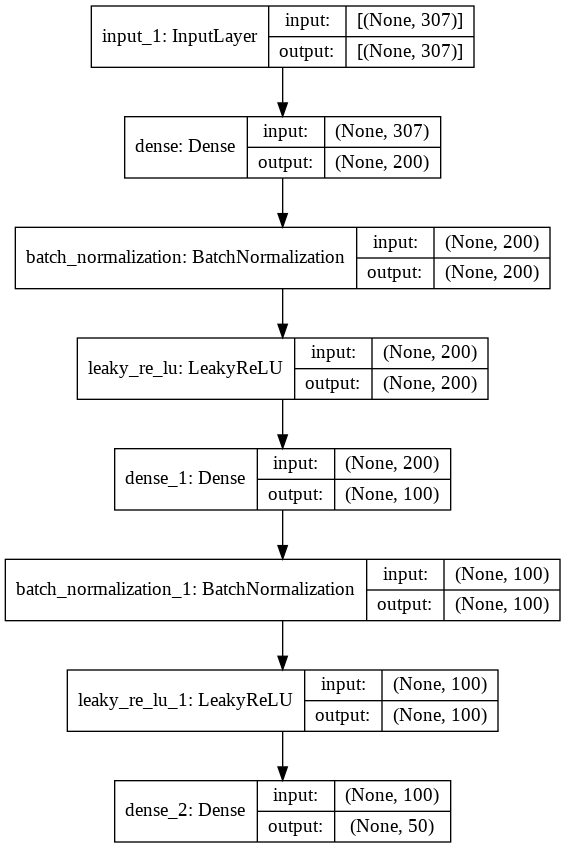

In [57]:
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)

In [58]:
# encode the train data
X_train_encode = encoder.predict(X_tr_fasttext)  # get the compressed features for train and test
# encode the test data
X_test_encode = encoder.predict(X_te_fasttext)

### **final features fastText + autoencoded + numerical**

In [59]:
from scipy.sparse import hstack       

X_tr_fasttext_final = np.concatenate([X_tr_fasttext, X_train_encode], axis=1)
X_te_fasttext_final = np.concatenate([X_te_fasttext, X_test_encode], axis=1)

print("Final Data matrix with fastText encoded features representation for description")
print(X_tr_fasttext_final.shape)
print(X_te_fasttext_final.shape)
print("="*100)

Final Data matrix with fastText encoded features representation for description
(7670, 357)
(1640, 357)


# Modeling

In [ ]:
# https://www.kaggle.com/rhodiumbeng/classifying-multi-label-comments-0-9741-lb

Trying various ML algorithm for classification like Logistic Regression/Support vector machine/Random Forest and Boosted Trees with different featurization mentioned above.

### Techniques for Solving a Multi-Label classification problem
##### there are three methods to solve a multi-label classification problem, namely
1. Problem Transformation
2. Adapted Algorithm
3. Ensemble approaches 

### Problem Transformation
In this method, we will try to transform our multi-label problem into single-label problem(s).
This method can be carried out in three different ways as:

1. Binary Relevance
2. Classifier Chains
3. Label Powerset

In [ ]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from scipy import sparse
from datetime import datetime

In [ ]:
pip install scikit-multilearn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

In [ ]:
#  https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics

def exact_match_ratio(y_true, y_pred):
    MR = np.all(y_pred == y_true, axis=1).mean()
    return MR

In [ ]:
y_train = train[['Commenting', 'Staring', 'Touching']].values
y_test = test[['Commenting', 'Staring', 'Touching']].values

## Binary Relevance/OneVsRest

### Naive Bayes

#### featurization tfidf word

In [ ]:
parameters = [
    {   
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.001, 0.05, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 5, 10, 20, 25, 30, 50, 70, 100]
    }]

clf = GridSearchCV(BinaryRelevance(), parameters, cv=5, scoring='f1_micro', n_jobs=-1, verbose=2)
clf.fit(tfidf_train, y_train)

print (clf.best_params_, clf.best_score_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:   44.1s finished


{'classifier': MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True), 'classifier__alpha': 0.2} 0.6471013623619838


In [ ]:
classifier = clf.best_estimator_
classifier.fit(tfidf_train, y_train)

BinaryRelevance(classifier=MultinomialNB(alpha=0.2, class_prior=None,
                                         fit_prior=True),
                require_dense=[True, True])

In [ ]:
predictions = classifier.predict(tfidf_test)

In [ ]:
 print("Hamming Loss: ", hamming_loss(y_test, predictions))
print("Exact Match Ratio: ", exact_match_ratio(y_test, predictions))
print("Recall: ", recall_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Precision: ", precision_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Fl score: ", f1_score(y_true=y_test, y_pred=predictions, average='micro'))

Hamming Loss:  0.18739837398373985
Exact Match Ratio:  0.573780487804878
Recall:  0.5425888665325285
Precision:  0.771210676835081
Fl score:  0.637007874015748


#### featurization tfidf char

In [ ]:
parameters = [
    {   
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.001, 0.05, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 5, 10, 20, 25, 30, 50, 70, 100]
    }]

clf = GridSearchCV(BinaryRelevance(), parameters, cv=5, scoring='f1_micro', n_jobs=-1, verbose=2)
clf.fit(tfidf_train_char, y_train)

print (clf.best_params_, clf.best_score_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:   48.6s finished


{'classifier': MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True), 'classifier__alpha': 0.2} 0.644444595737496


In [ ]:
classifier = clf.best_estimator_
classifier.fit(tfidf_train_char, y_train)

BinaryRelevance(classifier=MultinomialNB(alpha=0.2, class_prior=None,
                                         fit_prior=True),
                require_dense=[True, True])

In [ ]:
predictions = classifier.predict(tfidf_test_char)

In [ ]:
 print("Hamming Loss: ", hamming_loss(y_test, predictions))
print("Exact Match Ratio: ", exact_match_ratio(y_test, predictions))
print("Recall: ", recall_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Precision: ", precision_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Fl score: ", f1_score(y_true=y_test, y_pred=predictions, average='micro'))

Hamming Loss:  0.19390243902439025
Exact Match Ratio:  0.5603658536585366
Recall:  0.5720992622401073
Precision:  0.7296834901625321
Fl score:  0.6413533834586466


#### featurization tfidf (word + char) plus numerical features

In [ ]:
parameters = [
    {   
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.001, 0.05, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 5, 10, 20, 25, 30, 50, 70, 100]
    }]

clf = GridSearchCV(BinaryRelevance(), parameters, cv=5, scoring='f1_micro', n_jobs=-1, verbose=2)
clf.fit(X_tr_tfidf, y_train)

print (clf.best_params_, clf.best_score_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:  1.5min finished


{'classifier': MultinomialNB(alpha=0.4, class_prior=None, fit_prior=True), 'classifier__alpha': 0.4} 0.6756820767381301


In [ ]:
classifier = clf.best_estimator_
classifier.fit(X_tr_tfidf, y_train)

BinaryRelevance(classifier=MultinomialNB(alpha=0.4, class_prior=None,
                                         fit_prior=True),
                require_dense=[True, True])

In [ ]:
predictions = classifier.predict(X_te_tfidf)

In [ ]:
 print("Hamming Loss: ", hamming_loss(y_test, predictions))
print("Exact Match Ratio: ", exact_match_ratio(y_test, predictions))
print("Recall: ", recall_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Precision: ", precision_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Fl score: ", f1_score(y_true=y_test, y_pred=predictions, average='micro'))

Hamming Loss:  0.1926829268292683
Exact Match Ratio:  0.5646341463414634
Recall:  0.6244131455399061
Precision:  0.7058377558756633
Fl score:  0.6626334519572953


#### Report Multinomial Naive Bayes Classifier

In [ ]:
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hamming loss", "F1 score", "Precision", "Recall", "Exact Match Ratio"]
x.add_row(["tf-idf (word)", 'Multinomial Naive Bayes', 0.1873, 0.6370, 0.7712, 0.5425, 0.5737])
x.add_row(["tf-idf (character)", 'Multinomial Naive Bayes', 0.1939, 0.6413, 0.7296, 0.5720,  0.5603])
x.add_row(["tf-idf (word + character)", 'Multinomial Naive Bayes', 0.1926, 0.6626, 0.7058, 0.6244, 0.5646])

In [ ]:
print(x)

+---------------------------+-------------------------+--------------+----------+-----------+--------+-------------------+
|         Vectorizer        |          Model          | Hamming loss | F1 score | Precision | Recall | Exact Match Ratio |
+---------------------------+-------------------------+--------------+----------+-----------+--------+-------------------+
|       tf-idf (word)       | Multinomial Naive Bayes |    0.1873    |  0.637   |   0.7712  | 0.5425 |       0.5737      |
|     tf-idf (character)    | Multinomial Naive Bayes |    0.1939    |  0.6413  |   0.7296  | 0.572  |       0.5603      |
| tf-idf (word + character) | Multinomial Naive Bayes |    0.1926    |  0.6626  |   0.7058  | 0.6244 |       0.5646      |
+---------------------------+-------------------------+--------------+----------+-----------+--------+-------------------+


### Logistic regression

#### featurization tfidf word

In [ ]:
parameters = [
    {   
        'classifier': [LogisticRegression()],
        "classifier__C":[0.001, 0.01, 0.1, 1, 10, 100],
        "classifier__penalty":['l2'],
        "classifier__solver":["newton-cg", "lbfgs", "liblinear", "sag"]

    }]

clf = GridSearchCV(BinaryRelevance(), parameters, cv=5, scoring='f1_micro', n_jobs=-1,verbose=2)
clf.fit(tfidf_train, y_train)

print (clf.best_params_, clf.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 22.2min finished


{'classifier': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False), 'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'} 0.6623639608458858


In [ ]:
classifier = clf.best_estimator_
classifier.fit(tfidf_train, y_train)

BinaryRelevance(classifier=LogisticRegression(C=10, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, max_iter=100,
                                              multi_class='auto', n_jobs=None,
                                              penalty='l2', random_state=None,
                                              solver='liblinear', tol=0.0001,
                                              verbose=0, warm_start=False),
                require_dense=[True, True])

In [ ]:
predictions = classifier.predict(tfidf_test)

In [ ]:
 print("Hamming Loss: ", hamming_loss(y_test, predictions))
print("Exact Match Ratio: ", exact_match_ratio(y_test, predictions))
print("Recall: ", recall_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Precision: ", precision_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Fl score: ", f1_score(y_true=y_test, y_pred=predictions, average='micro'))                                         

Hamming Loss:  0.17947154471544716
Exact Match Ratio:  0.5865853658536585
Recall:  0.5875251509054326
Precision:  0.7657342657342657
Fl score:  0.6648956356736243


#### featurization tfidf char

In [ ]:
parameters = [
    {   
        'classifier': [LogisticRegression()],
        "classifier__C":[0.001, 0.01, 0.1, 1, 10, 100],
        "classifier__penalty":['l2'],
        "classifier__solver":["newton-cg", "lbfgs", "liblinear", "sag"]

    }]

clf = GridSearchCV(BinaryRelevance(), parameters, cv=5, scoring='f1_micro', n_jobs=-1,verbose=2)
clf.fit(tfidf_train_char, y_train)

print (clf.best_params_, clf.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 13.8min finished


{'classifier': LogisticRegression(C=10), 'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'} 0.6681545524235319


In [ ]:
classifier = clf.best_estimator_
classifier.fit(tfidf_train_char, y_train)

BinaryRelevance(classifier=LogisticRegression(C=10), require_dense=[True, True])

In [ ]:
predictions = classifier.predict(tfidf_test_char)

In [ ]:
print("Hamming Loss: ", hamming_loss(y_test, predictions))
print("Exact Match Ratio: ", exact_match_ratio(y_test, predictions))
print("Recall: ", recall_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Precision: ", precision_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Fl score: ", f1_score(y_true=y_test, y_pred=predictions, average='micro'))                                         

Hamming Loss:  0.17947154471544716
Exact Match Ratio:  0.5865853658536585
Recall:  0.5875251509054326
Precision:  0.7657342657342657
Fl score:  0.6648956356736243


#### featurization tfidf (word + char) plus numerical features  

In [ ]:
parameters = [
    {   
        'classifier': [LogisticRegression()],
        "classifier__C":[0.001, 0.01, 0.1, 1, 10, 100],
        "classifier__penalty":['l2'],
        "classifier__solver":["newton-cg", "lbfgs", "liblinear", "sag"]

    }]

clf = GridSearchCV(BinaryRelevance(), parameters, cv=5, scoring='f1_micro', n_jobs=-1,verbose=2)
clf.fit(X_tr_tfidf, y_train)

print (clf.best_params_, clf.best_score_)                                                                                       

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 35.2min finished


{'classifier': LogisticRegression(C=1, solver='liblinear'), 'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'} 0.6707016927701435


In [ ]:
classifier = clf.best_estimator_
classifier.fit(X_tr_tfidf, y_train)

BinaryRelevance(classifier=LogisticRegression(C=1, solver='liblinear'),
                require_dense=[True, True])

In [ ]:
predictions = classifier.predict(X_te_tfidf)

In [ ]:
print("Hamming Loss: ", hamming_loss(y_test, predictions))
print("Exact Match Ratio: ", exact_match_ratio(y_test, predictions))
print("Recall: ", recall_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Precision: ", precision_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Fl score: ", f1_score(y_true=y_test, y_pred=predictions, average='micro'))                                         

Hamming Loss:  0.16199186991869918
Exact Match Ratio:  0.6323170731707317
Recall:  0.5573440643863179
Precision:  0.8584710743801653
Fl score:  0.675884505896706


#### featurization tf-idf w2v + numerical features

In [ ]:
parameters = [
    {   
        'classifier': [LogisticRegression()],
        "classifier__C":[0.001, 0.01, 0.1, 1, 10, 100],
        "classifier__penalty":['l2'],
        "classifier__solver":["newton-cg", "lbfgs", "liblinear", "sag"]

    }]

clf = GridSearchCV(BinaryRelevance(), parameters, cv=5, scoring='f1_micro', n_jobs=-1,verbose=2)
clf.fit(X_tr_tfidf_w2v, y_train)

print (clf.best_params_, clf.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.7min finished


{'classifier': LogisticRegression(C=100), 'classifier__C': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'} 0.6021189856113118


In [ ]:
classifier = clf.best_estimator_
classifier.fit(X_tr_tfidf_w2v, y_train)

BinaryRelevance(classifier=LogisticRegression(C=100),
                require_dense=[True, True])

In [ ]:
predictions = classifier.predict(X_te_tfidf_w2v)

In [ ]:
print("Hamming Loss: ", hamming_loss(y_test, predictions))
print("Exact Match Ratio: ", exact_match_ratio(y_test, predictions))
print("Recall: ", recall_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Precision: ", precision_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Fl score: ", f1_score(y_true=y_test, y_pred=predictions, average='micro'))                                         

Hamming Loss:  0.200609756097561
Exact Match Ratio:  0.552439024390244
Recall:  0.5016767270288397
Precision:  0.7540322580645161
Fl score:  0.6024969794603302


#### fastText embedded words + Autoencoded features + numerical features

In [ ]:
parameters = [
    {   
        'classifier': [LogisticRegression()],
        "classifier__C":[0.001, 0.01, 0.1, 1, 10, 100],
        "classifier__penalty":['l2'],
        "classifier__solver":["newton-cg", "lbfgs", "liblinear", "sag"]

    }]

clf = GridSearchCV(BinaryRelevance(), parameters, cv=5, scoring='f1_micro', n_jobs=-1,verbose=2)
clf.fit(X_tr_fasttext_final, y_train)

print(clf.best_params_, clf.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  9.8min finished


{'classifier': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'} 0.6511950754208793


In [ ]:
classifier = clf.best_estimator_
classifier.fit(X_tr_fasttext_final, y_train)

BinaryRelevance(classifier=LogisticRegression(C=1, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, max_iter=100,
                                              multi_class='auto', n_jobs=None,
                                              penalty='l2', random_state=None,
                                              solver='lbfgs', tol=0.0001,
                                              verbose=0, warm_start=False),
                require_dense=[True, True])

In [ ]:
predictions = classifier.predict(X_te_fasttext_final)

In [ ]:
print("Hamming Loss: ", hamming_loss(y_test, predictions))
print("Exact Match Ratio: ", exact_match_ratio(y_test, predictions))
print("Recall: ", recall_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Precision: ", precision_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Fl score: ", f1_score(y_true=y_test, y_pred=predictions, average='micro'))                  

Hamming Loss:  0.18536585365853658
Exact Match Ratio:  0.5853658536585366
Recall:  0.5291750503018109
Precision:  0.7897897897897898
Fl score:  0.6337349397590362


#### Report Logistic Regression

In [ ]:
y = PrettyTable()
y.field_names = ["Vectorizer","Model","Hamming loss","F1 score","Precision","Recall","EMR"]
y.add_row(["tf-idf(word)",'Logistic Regression',0.1794,0.6648,0.7657,0.5875,0.5865])
y.add_row(["tf-idf(character)",'Logistic Regression',0.1794,0.6648,0.7657,0.5875,0.5865])
y.add_row(["tf-idf(word+character)",'Logistic Regression',0.1619,0.6758,0.8584,0.5573,0.6323])
y.add_row(["tf-idf w2v + Numerical",'Logistic Regression',0.2006,0.6024,0.7540,0.5016,0.5524])
y.add_row(["fastText + Autoencoded + ### Report XGBoost ClassifierNumerical",'Logistic Regression',0.1853,0.6337,0.7897,0.5291,0.5853])

In [ ]:
print(y)

+------------------------------------+---------------------+--------------+----------+-----------+--------+--------+
|             Vectorizer             |        Model        | Hamming loss | F1 score | Precision | Recall |  EMR   |
+------------------------------------+---------------------+--------------+----------+-----------+--------+--------+
|            tf-idf(word)            | Logistic Regression |    0.1794    |  0.6648  |   0.7657  | 0.5875 | 0.5865 |
|         tf-idf(character)          | Logistic Regression |    0.1794    |  0.6648  |   0.7657  | 0.5875 | 0.5865 |
|       tf-idf(word+character)       | Logistic Regression |    0.1619    |  0.6758  |   0.8584  | 0.5573 | 0.6323 |
|       tf-idf w2v + Numerical       | Logistic Regression |    0.2006    |  0.6024  |   0.754   | 0.5016 | 0.5524 |
| fastText + Autoencoded + Numerical | Logistic Regression |    0.1853    |  0.6337  |   0.7897  | 0.5291 | 0.5853 |
+------------------------------------+---------------------+----

### Support Vector Machine (classifier)

#### featurization tfidf word + numerical features

In [ ]:
parameters = [
    {
        'classifier': [SVC()],
        'classifier__C': [50, 10, 1.0, 0.1]
    }
    ]

clf = GridSearchCV(BinaryRelevance(), parameters, cv=5, scoring='f1_micro', n_jobs=-1, verbose=2)
clf.fit(tfidf_train, y_train)

print(clf.best_params_, clf.best_score_)                                                     

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 184.6min finished


{'classifier': SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'classifier__C': 10} 0.665582200843134


In [ ]:
classifier = clf.best_estimator_
classifier.fit(tfidf_train, y_train)

BinaryRelevance(classifier=SVC(C=10, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True])

In [ ]:
predictions = classifier.predict(tfidf_test)

In [ ]:
print("Hamming Loss: ", hamming_loss(y_test, predictions))
print("Exact Match Ratio: ", exact_match_ratio(y_test, predictions))
print("Recall: ", recall_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Precision: ", precision_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Fl score: ", f1_score(y_true=y_test, y_pred=predictions, average='micro'))                                         

Hamming Loss:  0.1766260162601626
Exact Match Ratio:  0.6024390243902439
Recall:  0.5781354795439303
Precision:  0.7822141560798548
Fl score:  0.6648669494793676


#### featurization tfidf char + numerical features

In [ ]:
parameters = [
    {
        'classifier': [SVC()],
        'classifier__C': [50, 10, 1.0, 0.1],
        'classifier__kernel':['poly', 'rbf']
    }
    ]

clf = GridSearchCV(BinaryRelevance(), parameters, cv=5, scoring='f1_micro', n_jobs=-1,verbose=2)
clf.fit(tfidf_train_char, y_train)

print (clf.best_params_, clf.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 155.8min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 197.1min finished


{'classifier': SVC(C=50), 'classifier__C': 50, 'classifier__kernel': 'rbf'} 0.6794135061610851


In [ ]:
classifier = clf.best_estimator_
classifier.fit(tfidf_train_char, y_train)

BinaryRelevance(classifier=SVC(C=50), require_dense=[True, True])

In [ ]:
predictions = classifier.predict(tfidf_test_char)

In [ ]:
print("Hamming Loss: ", hamming_loss(y_test, predictions))
print("Exact Match Ratio: ", exact_match_ratio(y_test, predictions))
print("Recall: ", recall_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Precision: ", precision_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Fl score: ", f1_score(y_true=y_test, y_pred=predictions, average='micro'))                                         

Hamming Loss:  0.16361788617886178
Exact Match Ratio:  0.6317073170731707
Recall:  0.6063044936284373
Precision:  0.8057040998217468
Fl score:  0.691924990432453


#### featurization tfidf (word + char) plus numerical features

In [ ]:
parameters = [
    {
        'classifier': [SVC()],
        'classifier__C': [50, 10, 1.0, 0.1, 0.01],
        'classifier__kernel':['poly', 'rbf']
    }
    ]

clf = GridSearchCV(BinaryRelevance(), parameters, cv=5, scoring='f1_micro', n_jobs=-1,verbose=2)
clf.fit(X_tr_tfidf, y_train)

print (clf.best_params_, clf.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 306.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 474.7min finished


{'classifier': SVC(C=10), 'classifier__C': 10, 'classifier__kernel': 'rbf'} 0.6805188656961054


In [ ]:
classifier = clf.best_estimator_
classifier.fit(X_tr_tfidf, y_train)

BinaryRelevance(classifier=SVC(C=10), require_dense=[True, True])

In [ ]:
predictions = classifier.predict(X_te_tfidf)

In [ ]:
print("Hamming Loss: ", hamming_loss(y_test, predictions))
print("Exact Match Ratio: ", exact_match_ratio(y_test, predictions))
print("Recall: ", recall_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Precision: ", precision_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Fl score: ", f1_score(y_true=y_test, y_pred=predictions, average='micro'))                                         

Hamming Loss:  0.16890243902439026
Exact Match Ratio:  0.6158536585365854
Recall:  0.608316566063045
Precision:  0.7859618717504333
Fl score:  0.6858223062381853


#### featurization tf-idf w2v + numerical features

In [ ]:
parameters = [
    {
        'classifier': [SVC()],
        'classifier__C': [50, 10, 1.0, 0.1, 0.01],
        'classifier__kernel':['poly', 'rbf']
    }
    ]

clf = GridSearchCV(BinaryRelevance(), parameters, cv=5, scoring='f1_micro', n_jobs=6,verbose=2)
clf.fit(X_tr_tfidf_w2v, y_train)

print (clf.best_params_, clf.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  9.7min
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed: 16.2min finished


{'classifier': SVC(C=10), 'classifier__C': 10, 'classifier__kernel': 'rbf'} 0.632008711822168


In [ ]:
classifier = clf.best_estimator_
classifier.fit(X_tr_tfidf_w2v, y_train)

BinaryRelevance(classifier=SVC(C=10), require_dense=[True, True])

In [ ]:
predictions = classifier.predict(X_te_tfidf_w2v)

In [ ]:
print("Hamming Loss: ", hamming_loss(y_test, predictions))
print("Exact Match Ratio: ", exact_match_ratio(y_test, predictions))
print("Recall: ", recall_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Precision: ", precision_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Fl score: ", f1_score(y_true=y_test, y_pred=predictions, average='micro'))                                         

Hamming Loss:  0.19634146341463415
Exact Match Ratio:  0.5640243902439024
Recall:  0.5090543259557344
Precision:  0.7643504531722054
Fl score:  0.6111111111111112


#### fastText embedded words + Autoencoded features + numerical features

In [ ]:
parameters = [
    {
        'classifier': [SVC()],
        'classifier__C': [50, 10, 1.0, 0.1, 0.01],
        'classifier__kernel':['poly', 'rbf']
    }
    ]

clf = GridSearchCV(BinaryRelevance(), parameters, cv=5, scoring='f1_micro', n_jobs=-1,verbose=2)
clf.fit(X_tr_fasttext_final, y_train)

print (clf.best_params_, clf.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 17.5min finished


{'classifier': SVC(C=50), 'classifier__C': 50, 'classifier__kernel': 'rbf'} 0.650630153083325


In [ ]:
classifier = clf.best_estimator_
classifier.fit(X_tr_fasttext_final, y_train)

BinaryRelevance(classifier=SVC(C=50), require_dense=[True, True])

In [ ]:
predictions = classifier.predict(X_te_fasttext_final)

In [ ]:
print("Hamming Loss: ", hamming_loss(y_test, predictions))
print("Exact Match Ratio: ", exact_match_ratio(y_test, predictions))
print("Recall: ", recall_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Precision: ", precision_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Fl score: ", f1_score(y_true=y_test, y_pred=predictions, average='micro'))                                         

Hamming Loss:  0.18333333333333332
Exact Match Ratio:  0.5853658536585366
Recall:  0.574111334674715
Precision:  0.7622439893143366
Fl score:  0.6549349655700076


#### Report SVM Classifier

In [ ]:
y = PrettyTable()
y.field_names = ["Vectorizer","Model","Hamming loss","F1 score","Precision","Recall","EMR"]
y.add_row(["tf-idf(word)",'SVM',0.1766,0.6648,0.7822,0.5781,0.6024])
y.add_row(["tf-idf(character)",'SVM',0.1636, 0.6919, 0.8057, 0.6063, 0.6317])
y.add_row(["tf-idf(word+character)",'SVM',0.1689, 0.6858, 0.7859, 0.6083, 0.6158])
y.add_row(["tf-idf w2v + Numerical",'SVM',0.1963, 0.6111, 0.7643, 0.5090, 0.5640])
y.add_row(["fastText + Autoencoded + Numerical",'SVM',0.1833, 0.6549, 0.7622, 0.5741, 0.5853])

In [ ]:
print(y)

+------------------------------------+-------+--------------+----------+-----------+--------+--------+
|             Vectorizer             | Model | Hamming loss | F1 score | Precision | Recall |  EMR   |
+------------------------------------+-------+--------------+----------+-----------+--------+--------+
|            tf-idf(word)            |  SVM  |    0.1766    |  0.6648  |   0.7822  | 0.5781 | 0.6024 |
|         tf-idf(character)          |  SVM  |    0.1636    |  0.6919  |   0.8057  | 0.6063 | 0.6317 |
|       tf-idf(word+character)       |  SVM  |    0.1689    |  0.6858  |   0.7859  | 0.6083 | 0.6158 |
|       tf-idf w2v + Numerical       |  SVM  |    0.1963    |  0.6111  |   0.7643  | 0.509  | 0.564  |
| fastText + Autoencoded + Numerical |  SVM  |    0.1833    |  0.6549  |   0.7622  | 0.5741 | 0.5853 |
+------------------------------------+-------+--------------+----------+-----------+--------+--------+


### Random Forest

#### featurization tfidf word + numerical features

In [ ]:
parameters = [
        {'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [10, 100, 1000],
        'classifier__max_features' : ['sqrt', 'log2']
        }
]

clf = GridSearchCV(BinaryRelevance(), parameters, cv=5, scoring='f1_micro', n_jobs=6, verbose=2)
clf.fit(tfidf_train, y_train)

print(clf.best_params_, clf.best_score_)                                                     

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed: 121.7min finished


{'classifier': RandomForestClassifier(max_features='sqrt', n_estimators=1000), 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 1000} 0.6754393078110347


In [ ]:
classifier = clf.best_estimator_
classifier.fit(tfidf_train, y_train)

BinaryRelevance(classifier=RandomForestClassifier(max_features='sqrt',
                                                  n_estimators=1000),
                require_dense=[True, True])

In [ ]:
predictions = classifier.predict(tfidf_test)

In [ ]:
print("Hamming Loss: ", hamming_loss(y_test, predictions))
print("Exact Match Ratio: ", exact_match_ratio(y_test, predictions))
print("Recall: ", recall_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Precision: ", precision_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Fl score: ", f1_score(y_true=y_test, y_pred=predictions, average='micro'))                                         

Hamming Loss:  0.16849593495934959
Exact Match Ratio:  0.6219512195121951
Recall:  0.5928906773977196
Precision:  0.7992766726943942
Fl score:  0.6807855217558721


#### featurization tfidf char + numerical features

In [ ]:
parameters = [
        {'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [10, 100, 1000],
        'classifier__max_features' : ['sqrt', 'log2']
        }
    ]

clf = GridSearchCV(BinaryRelevance(), parameters, cv=5, scoring='f1_micro', n_jobs=6, verbose=2)
clf.fit(tfidf_train_char, y_train)

print(clf.best_params_, clf.best_score_)                                                     

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed: 42.9min finished


{'classifier': RandomForestClassifier(max_features='sqrt', n_estimators=1000), 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 1000} 0.6638107864591757


In [ ]:
classifier = clf.best_estimator_
classifier.fit(tfidf_train_char, y_train)

BinaryRelevance(classifier=RandomForestClassifier(max_features='sqrt',
                                                  n_estimators=1000),
                require_dense=[True, True])

In [ ]:
predictions = classifier.predict(tfidf_test_char)

In [ ]:
print("Hamming Loss: ", hamming_loss(y_test, predictions))
print("Exact Match Ratio: ", exact_match_ratio(y_test, predictions))
print("Recall: ", recall_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Precision: ", precision_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Fl score: ", f1_score(y_true=y_test, y_pred=predictions, average='micro'))

Hamming Loss:  0.16361788617886178
Exact Match Ratio:  0.6304878048780488
Recall:  0.5613682092555332
Precision:  0.847165991902834
Fl score:  0.6752722872125857


#### featurization tfidf (word + char) plus numerical features

In [ ]:
parameters = [
        {'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [500 ,1000, 1500],
        'classifier__max_features' : ['sqrt', 'log2']
        }
    ]

clf = GridSearchCV(BinaryRelevance(), parameters, cv=5, scoring='f1_micro', n_jobs=6, verbose=2)
clf.fit(X_tr_tfidf, y_train)

print(clf.best_params_, clf.best_score_)                                                     

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed: 176.2min finished


{'classifier': RandomForestClassifier(max_features='sqrt', n_estimators=1000), 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 1000} 0.6657344917615002


In [ ]:
classifier = clf.best_estimator_
classifier.fit(X_tr_tfidf, y_train)

BinaryRelevance(classifier=RandomForestClassifier(max_features='sqrt',
                                                  n_estimators=1000),
                require_dense=[True, True])

In [ ]:
predictions = classifier.predict(X_te_tfidf)

In [ ]:
print("Hamming Loss: ", hamming_loss(y_test, predictions))
print("Exact Match Ratio: ", exact_match_ratio(y_test, predictions))
print("Recall: ", recall_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Precision: ", precision_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Fl score: ", f1_score(y_true=y_test, y_pred=predictions, average='micro'))

Hamming Loss:  0.16321138211382114
Exact Match Ratio:  0.6292682926829268
Recall:  0.5586854460093896
Precision:  0.8517382413087935
Fl score:  0.6747671121911706


#### featurization tf-idf w2v + numerical features

In [ ]:
parameters = [
        {'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [500, 1000, 1200],
        'classifier__max_features' : ['sqrt']
        }
    ]

clf = GridSearchCV(BinaryRelevance(), parameters, cv=5, scoring='f1_micro', n_jobs=6, verbose=2)
clf.fit(X_tr_tfidf_w2v, y_train)

print(clf.best_params_, clf.best_score_)                                                     

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  12 out of  15 | elapsed: 23.5min remaining:  5.9min
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed: 27.5min finished


{'classifier': RandomForestClassifier(max_features='sqrt', n_estimators=1200), 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 1200} 0.5005482003385637


In [ ]:
classifier = clf.best_estimator_
classifier.fit(X_tr_tfidf_w2v, y_train)

BinaryRelevance(classifier=RandomForestClassifier(max_features='sqrt',
                                                  n_estimators=1200),
                require_dense=[True, True])

In [ ]:
predictions = classifier.predict(X_te_tfidf_w2v)

In [ ]:
print("Hamming Loss: ", hamming_loss(y_test, predictions))
print("Exact Match Ratio: ", exact_match_ratio(y_test, predictions))
print("Recall: ", recall_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Precision: ", precision_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Fl score: ", f1_score(y_true=y_test, y_pred=predictions, average='micro'))

Hamming Loss:  0.21727642276422765
Exact Match Ratio:  0.5079268292682927
Recall:  0.3890006706908115
Precision:  0.7859078590785907
Fl score:  0.5204127411395244


#### fastText embedded words + Autoencoded features + numerical features

In [ ]:
parameters = [
        {'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [1000, 1200, 1500],
        'classifier__max_features' : ['sqrt']
        }
    ]

clf = GridSearchCV(BinaryRelevance(), parameters, cv=5, scoring='f1_micro', n_jobs=6, verbose=2)
clf.fit(X_tr_fasttext_final, y_train)

print(clf.best_params_, clf.best_score_)                                                     

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  12 out of  15 | elapsed: 27.3min remaining:  6.8min
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed: 34.4min finished


{'classifier': RandomForestClassifier(max_features='sqrt', n_estimators=1000), 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 1000} 0.5578870134887932


In [ ]:
classifier = clf.best_estimator_
classifier.fit(X_tr_fasttext_final, y_train)

BinaryRelevance(classifier=RandomForestClassifier(max_features='sqrt',
                                                  n_estimators=1000),
                require_dense=[True, True])

In [ ]:
predictions = classifier.predict(X_te_fasttext_final)

In [ ]:
print("Hamming Loss: ", hamming_loss(y_test, predictions))
print("Exact Match Ratio: ", exact_match_ratio(y_test, predictions))
print("Recall: ", recall_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Precision: ", precision_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Fl score: ", f1_score(y_true=y_test, y_pred=predictions, average='micro'))

Hamming Loss:  0.20792682926829267
Exact Match Ratio:  0.5341463414634147
Recall:  0.4211938296445339
Precision:  0.7969543147208121
Fl score:  0.5511189118034224


#### Report Random Forest Classifier

In [ ]:
y = PrettyTable()
y.field_names = ["Vectorizer","Model","Hamming loss","F1 score","Precision","Recall","EMR"]
y.add_row(["tf-idf(word)",'Random Forest',0.1684, 0.6807, 0.7992, 0.5928, 0.6219])
y.add_row(["tf-idf(character)",'Random Forest',0.1636, 0.6752, 0.8471, 0.5613, 0.6304])
y.add_row(["tf-idf(word+character)",'Random Forest',0.1632, 0.6747, 0.8517, 0.5586, 0.6292])
y.add_row(["tf-idf w2v + Numerical",'Random Forest',0.2172, 0.5204, 0.7859, 0.3890, 0.5079])
y.add_row(["fastText + Autoencoded + Numerical",'Random Forest',0.2079,0.5511,0.7969,0.4211,0.5341])

In [ ]:
print(y)

+------------------------------------+---------------+--------------+----------+-----------+--------+--------+
|             Vectorizer             |     Model     | Hamming loss | F1 score | Precision | Recall |  EMR   |
+------------------------------------+---------------+--------------+----------+-----------+--------+--------+
|            tf-idf(word)            | Random Forest |    0.1684    |  0.6807  |   0.7992  | 0.5928 | 0.6219 |
|         tf-idf(character)          | Random Forest |    0.1636    |  0.6752  |   0.8471  | 0.5613 | 0.6304 |
|       tf-idf(word+character)       | Random Forest |    0.1632    |  0.6747  |   0.8517  | 0.5586 | 0.6292 |
|       tf-idf w2v + Numerical       | Random Forest |    0.2172    |  0.5204  |   0.7859  | 0.389  | 0.5079 |
| fastText + Autoencoded + Numerical | Random Forest |    0.2079    |  0.5511  |   0.7969  | 0.4211 | 0.5341 |
+------------------------------------+---------------+--------------+----------+-----------+--------+--------+


## XGBoost 

#### featurization tf-idf w2v + numerical features

In [ ]:
from xgboost import XGBClassifier
parameters = [
          {
            'classifier': [XGBClassifier()],
            'classifier__learning_rate' :[0.001, 0.01, 0.1],
            'classifier__n_estimators':[10, 100, 250, 500, 1000, 2000],
            'classifier__subsample': [0.5, 0.7, 1.0],
            'classifier__max_depth': [3, 7, 9]
          }
        ]
        
clf = RandomizedSearchCV(BinaryRelevance(), parameters, cv=5, scoring='f1_micro', n_jobs=6, verbose=2)
clf.fit(X_tr_tfidf_w2v, y_train)

print(clf.best_params_, clf.best_score_)                                                     

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 143.4min
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed: 211.8min finished


[01:15:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:23:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'classifier__subsample': 1.0, 'classifier__n_estimators': 2000, 'clas

In [ ]:
classifier = clf.best_estimator_
classifier.fit(X_tr_tfidf_w2v, y_train)

[01:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:34:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


BinaryRelevance(classifier=XGBClassifier(base_score=None, booster=None,
                                         colsample_bylevel=None,
                                         colsample_bynode=None,
                                         colsample_bytree=None, gamma=None,
                                         gpu_id=None, importance_type='gain',
                                         interaction_constraints=None,
                                         learning_rate=0.1, max_delta_step=None,
                                         max_depth=3, min_child_weight=None,
                                         missing=nan, monotone_constraints=None,
                                         n_estimators=2000, n_jobs=None,
                                         num_parallel_tree=None,
                                         random_state=None, reg_alpha=None,
                                         reg_lambda=None, scale_pos_weight=None,
                                        

In [ ]:
predictions = classifier.predict(X_te_tfidf_w2v)

In [ ]:
print("Hamming Loss: ", hamming_loss(y_test, predictions))
print("Exact Match Ratio: ", exact_match_ratio(y_test, predictions))
print("Recall: ", recall_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Precision: ", precision_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Fl score: ", f1_score(y_true=y_test, y_pred=predictions, average='micro'))

Hamming Loss:  0.2056910569105691
Exact Match Ratio:  0.5408536585365854
Recall:  0.5238095238095238
Precision:  0.7211449676823638
Fl score:  0.6068376068376069


#### fastText embedded words + Autoencoded features + numerical features

In [ ]:
from xgboost import XGBClassifier
parameters = [
          {
            'classifier': [XGBClassifier()],
            'classifier__learning_rate' :[0.01, 0.1],
            'classifier__n_estimators':[500, 1000, 2000],
            'classifier__subsample': [0.5, 0.7],
            'classifier__max_depth': [3, 7, 9]
          }
        ]
        
clf = RandomizedSearchCV(BinaryRelevance(), parameters, cv=5, scoring='f1_micro', n_jobs=-1, verbose=2)
clf.fit(X_tr_fasttext_final, y_train)

print(clf.best_params_, clf.best_score_)                                                     

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 169.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 418.7min finished


[19:34:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:38:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:41:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'classifier__subsample': 0.7, 'classifier__n_estimators': 2000, 'clas

In [ ]:
classifier = clf.best_estimator_
classifier.fit(X_tr_fasttext_final, y_train)

[19:45:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


BinaryRelevance(classifier=XGBClassifier(base_score=None, booster=None,
                                         colsample_bylevel=None,
                                         colsample_bynode=None,
                                         colsample_bytree=None, gamma=None,
                                         gpu_id=None, importance_type='gain',
                                         interaction_constraints=None,
                                         learning_rate=0.1, max_delta_step=None,
                                         max_depth=3, min_child_weight=None,
                                         missing=nan, monotone_constraints=None,
                                         n_estimators=2000, n_jobs=None,
                                         num_parallel_tree=None,
                                         random_state=None, reg_alpha=None,
                                         reg_lambda=None, scale_pos_weight=None,
                                        

In [ ]:
predictions = classifier.predict(X_te_fasttext_final)

In [ ]:
print("XGBoost with 'fastText embedded words + Autoencoded features + numerical features' featurization")
print(50*"*")
print("Hamming Loss: ", hamming_loss(y_test, predictions))
print("Exact Match Ratio: ", exact_match_ratio(y_test, predictions))
print("Recall: ", recall_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Precision: ", precision_score(y_true=y_test, y_pred=predictions, average='micro'))
print("Fl score: ", f1_score(y_true=y_test, y_pred=predictions, average='micro'))

XGBoost with 'fastText embedded words + Autoencoded features + numerical features' featurization
**************************************************
Hamming Loss:  0.18414634146341463
Exact Match Ratio:  0.5908536585365853
Recall:  0.5801475519785378
Precision:  0.7554585152838428
Fl score:  0.6562974203338391


#### Report XGBoost Classifier

In [ ]:
y = PrettyTable()
y.field_names = ["Vectorizer","Model","Hamming loss","F1 score","Precision","Recall","EMR"]
y.add_row(["tf-idf w2v + Numerical",'XGBoost classifier',0.2056, 0.6068, 0.7211, 0.5238, 0.5408])
y.add_row(["fastText + Autoencoded + Numerical",'XGBoost classifier',0.1841, 0.6562, 0.7554, 0.5801, 0.5908])

In [ ]:
print(y)

+------------------------------------+--------------------+--------------+----------+-----------+--------+--------+
|             Vectorizer             |       Model        | Hamming loss | F1 score | Precision | Recall |  EMR   |
+------------------------------------+--------------------+--------------+----------+-----------+--------+--------+
|       tf-idf w2v + Numerical       | XGBoost classifier |    0.2056    |  0.6068  |   0.7211  | 0.5238 | 0.5408 |
| fastText + Autoencoded + Numerical | XGBoost classifier |    0.1841    |  0.6562  |   0.7554  | 0.5801 | 0.5908 |
+------------------------------------+--------------------+--------------+----------+-----------+--------+--------+


## Best Models

In [ ]:
# naive bayes
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hamming loss", "F1 score", "Precision", "Recall", "Exact Match Ratio"]
x.add_row(["tf-idf (word)", 'Multinomial Naive Bayes', 0.1873, 0.6370, 0.7712, 0.5425, 0.5737])
x.add_row(["tf-idf(word+character)",'Logistic Regression',0.1619,0.6758,0.8584,0.5573,0.6323])
x.add_row(["tf-idf(character)",'SVM',0.1636, 0.6919, 0.8057, 0.6063, 0.6317])
x.add_row(["tf-idf(word+character)",'Random Forest',0.1632, 0.6747, 0.8517, 0.5586, 0.6292])
x.add_row(["fastText + Autoencoded + Numerical",'XGBoost classifier',0.1841, 0.6562, 0.7554, 0.5801, 0.5908])
print(x)

+------------------------------------+-------------------------+--------------+----------+-----------+--------+-------------------+
|             Vectorizer             |          Model          | Hamming loss | F1 score | Precision | Recall | Exact Match Ratio |
+------------------------------------+-------------------------+--------------+----------+-----------+--------+-------------------+
|           tf-idf (word)            | Multinomial Naive Bayes |    0.1873    |  0.637   |   0.7712  | 0.5425 |       0.5737      |
|       tf-idf(word+character)       |   Logistic Regression   |    0.1619    |  0.6758  |   0.8584  | 0.5573 |       0.6323      |
|         tf-idf(character)          |           SVM           |    0.1636    |  0.6919  |   0.8057  | 0.6063 |       0.6317      |
|       tf-idf(word+character)       |      Random Forest      |    0.1632    |  0.6747  |   0.8517  | 0.5586 |       0.6292      |
| fastText + Autoencoded + Numerical |    XGBoost classifier   |    0.1841  

##### When compared against Hamming Loss Logistic Regression with tf-idf(word + character) yields best results as compared to other models with different featurizations 